<a href="https://colab.research.google.com/github/onyangoju/1-Financial-Inclusion-in-Africa/blob/main/M3_Data_Preprocessing_%26FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PULL REQUEST FROM GIT HUB

In [ ]:
!git clone https://github.com/OndiekiFrank/Project_Titanic


Cloning into 'Project_Titanic'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 220 (delta 19), reused 47 (delta 11), pack-reused 152 (from 1)
Receiving objects: 100% (220/220), 1.32 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (97/97), done.


UPLOAD DATA FROM LOCAL MACHINE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


READ DATA

In [ ]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.shape)
print(df.columns)
print(df.info())


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


1.1 Handling Missing Values


In [ ]:
import pandas as pd
import seaborn as sns

# Load Titanic Dataset from Seaborn
df = sns.load_dataset("titanic")

# Check missing values
print(df.isnull().sum())

# Drop rows with missing age
df_drop = df.dropna(subset=["age"])

# Fill missing age with mean
df["age"] = df["age"].fillna(df["age"].mean())

# Fill missing embarked with mode
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


1.2 Handling Duplicates

In [ ]:
# Check duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 107


1.3 Handling Outliers

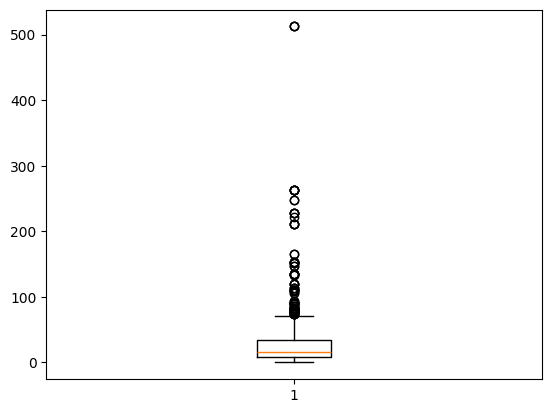

In [ ]:
import matplotlib.pyplot as plt

# Boxplot for fare
plt.boxplot(df["fare"])
plt.show()

# Remove outliers using IQR
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df["fare"] >= Q1 - 1.5*IQR) &
              (df["fare"] <= Q3 + 1.5*IQR)]


2.1 Normalization (Min-Max Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Select numerical columns
num_cols = ["age", "fare"]

scaler = MinMaxScaler()
df_norm = df[num_cols].copy()
df_norm[["age", "fare"]] = scaler.fit_transform(df[num_cols])

print(df_norm.head())

        age      fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


2.2 Standardization (Z-score Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = df[num_cols].copy()
df_std[["age", "fare"]] = scaler.fit_transform(df[num_cols])

print(df_std.head())

        age      fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337


2.3 Comparing Both Methods

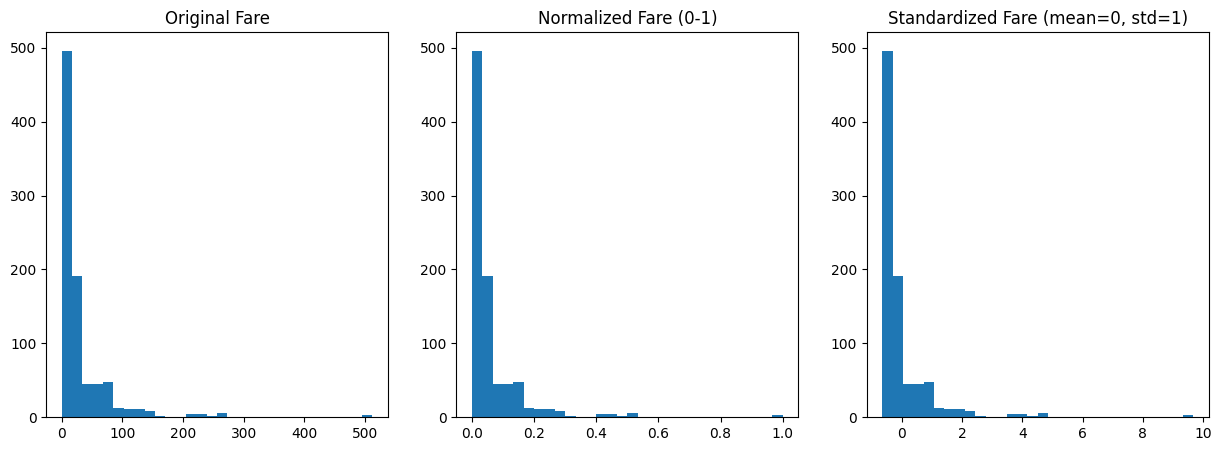

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].hist(df["fare"].dropna(), bins=30)
axes[0].set_title("Original Fare")

axes[1].hist(df_norm["fare"].dropna(), bins=30)
axes[1].set_title("Normalized Fare (0-1)")

axes[2].hist(df_std["fare"].dropna(), bins=30)
axes[2].set_title("Standardized Fare (mean=0, std=1)")

plt.show()

3.1 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Label Encode the 'sex' column
le = LabelEncoder()
df["sex_encoded"] = le.fit_transform(df["sex"])

print(df[["sex", "sex_encoded"]].head())

      sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


3.2 One-Hot Encoding

In [ ]:
# One-Hot Encode the 'embarked' column
df_encoded = pd.get_dummies(df, columns=["embarked"])

print(df_encoded.head())

   survived  pclass     sex   age  sibsp  parch     fare  class    who  \
0         0       3    male  22.0      1      0   7.2500  Third    man   
1         1       1  female  38.0      1      0  71.2833  First  woman   
2         1       3  female  26.0      0      0   7.9250  Third  woman   
3         1       1  female  35.0      1      0  53.1000  First  woman   
4         0       3    male  35.0      0      0   8.0500  Third    man   

   adult_male deck  embark_town alive  alone  sex_encoded  embarked_C  \
0        True  NaN  Southampton    no  False            1       False   
1       False    C    Cherbourg   yes  False            0        True   
2       False  NaN  Southampton   yes   True            0       False   
3       False    C  Southampton   yes  False            0       False   
4        True  NaN  Southampton    no   True            1       False   

   embarked_Q  embarked_S  
0       False        True  
1       False       False  
2       False        True  
3   

4.1 Creating New Features

In [ ]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Create a new feature for family size
df["family_size"] = df["sibsp"] + df["parch"] + 1

# Extract title from passenger name
df["title"] = df["who"]

print(df[["sibsp", "parch", "family_size", "title"]].head())

   sibsp  parch  family_size  title
0      1      0            2    man
1      1      0            2  woman
2      0      0            1  woman
3      1      0            2  woman
4      0      0            1    man



4.3 Binning Continuous Variables

In [ ]:
# Create age groups
df["age_group"] = pd.cut(df["age"], bins=[0, 12, 18, 60, 80],
                         labels=["child", "teen", "adult", "senior"])

print(df[["age", "age_group"]].head(10))

    age age_group
0  22.0     adult
1  38.0     adult
2  26.0     adult
3  35.0     adult
4  35.0     adult
5   NaN       NaN
6  54.0     adult
7   2.0     child
8  27.0     adult
9  14.0      teen
